In [1]:
import os
os.chdir('/home/gebhart/projects/rfunklab/network_structure')
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval as make_tuple
from network_structure.homology_parser import *
import persim

In [2]:
graph_type = 'collaboration'
cat_id = 1
collab_data_loc = '/home/gebhart/projects/rfunklab/data/temporal/1_1/collaboration/{}/homology'.format(cat_id)
knowl_data_loc = '/home/gebhart/projects/rfunklab/data/temporal/1_1/knowledge/{}/homology'.format(cat_id)

In [3]:
def interval_to_numpy(interval):
    if len(interval) > 1:
        return np.array([list(ival) if len(ival) > 1 else [ival[0],np.inf] for ival in interval])            
    return np.array([])

In [4]:
def plot_diagram(diagram, title='', lims=None):
    fig, ax = plt.subplots()
    if diagram.size > 0:
        d = diagram[~np.isinf(diagram[:,1])]
        if d.shape[0] > 0:
            ax.scatter(d[:,0], d[:,1], s=25, c=d[:,1]**2 - d[:,0], cmap=plt.cm.coolwarm, zorder=10)
            if lims is None:
                lims = [
                    np.min(d[:,0]-1),  # min of both axes
                    np.max(d[:,1]+1),  # max of both axes
                ]

            # now plot both limits against eachother
            ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
            ax.set_xlim(lims)
            ax.set_ylim(lims)
    ax.set_aspect('equal')
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title(title)

In [5]:
files = [f for f in os.listdir(collab_data_loc) if os.path.isfile(os.path.join(collab_data_loc, f))]
files.sort()
files = files[:-3] # last few years appear broken

1970
Betti Numbers:  [193, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [541, 627, 561, 563, 499, 339, 166, 55, 11, 1, 0]
1971
Betti Numbers:  [386, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [1072, 1181, 947, 938, 942, 781, 489, 219, 66, 12, 1, 0]


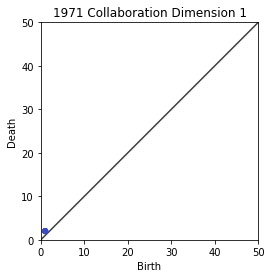

1972
Betti Numbers:  [737, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [2140, 2553, 2313, 2523, 2815, 2703, 2056, 1186, 498, 143, 25, 2, 0]


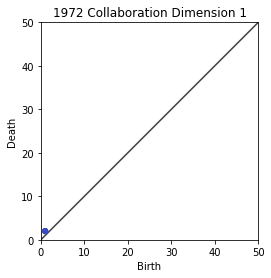

1973
Betti Numbers:  [1945, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [6279, 8447, 8833, 11406, 16067, 20868, 23214, 21569, 16527, 10310, 5147, 2006, 588, 122, 16, 1, 0]


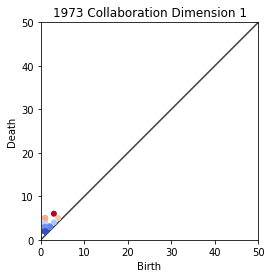

1974
Betti Numbers:  [4767, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [17383, 24536, 23814, 25924, 31164, 36795, 39419, 36710, 28824, 18578, 9578, 3837, 1149, 242, 32, 2, 0]


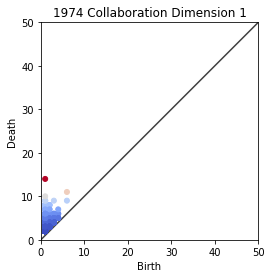

1975
Betti Numbers:  [6896, 93, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [26888, 39017, 39349, 51459, 87659, 157969, 262872, 382832, 479310, 513035, 468130, 362739, 237184, 129644, 58461, 21355, 6158, 1349, 211, 21, 1, 0]


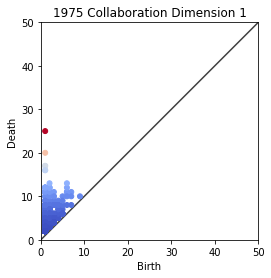

1976
Betti Numbers:  [7651, 107, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [29743, 43077, 45575, 71411, 151857, 325762, 618916, 1005504, 1387054, 1624084, 1614189, 1359881, 967605, 578002, 287281, 117303, 38649, 10013, 1962, 273, 24, 1, 0]


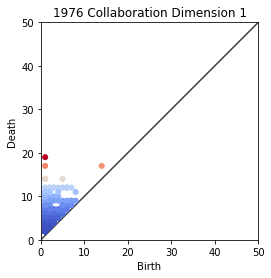

1977
Betti Numbers:  [7779, 112, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [30057, 44356, 51113, 91230, 217624, 524243, 1136155, 2144399, 3504459, 4967769, 6126159, 6583848, 6166293, 5022843, 3544244, 2153476, 1117487, 489934, 178911, 53385, 12673, 2301, 300, 25, 1, 0]


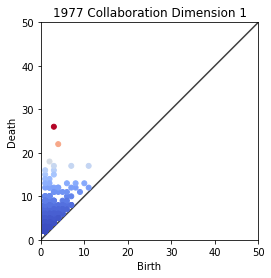

1978
Betti Numbers:  [7871, 141, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [30523, 45467, 51457, 83706, 178983, 401240, 844584, 1598471, 2672774, 3919471, 5022879, 5610474, 5446422, 4578124, 3316361, 2057697, 1085015, 481271, 177160, 53133, 12650, 2300, 300, 25, 1, 0]


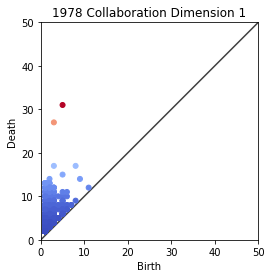

1979
Betti Numbers:  [7824, 152, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [30619, 44936, 46080, 58813, 87052, 122639, 150332, 156167, 136461, 99918, 60961, 30675, 12516, 4034, 987, 172, 19, 1, 0]


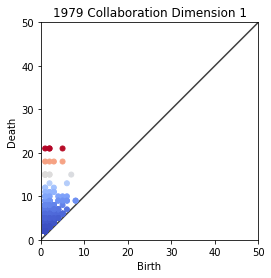

1980
Betti Numbers:  [7949, 155, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [31000, 45202, 44538, 52162, 71261, 94158, 107731, 102305, 79182, 49295, 24302, 9275, 2645, 531, 67, 4, 0]


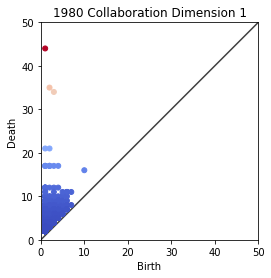

1981
Betti Numbers:  [8008, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [31285, 45704, 44799, 53313, 82793, 144413, 248686, 394776, 557301, 685520, 725501, 654665, 499807, 320268, 170609, 74617, 26334, 7315, 1540, 231, 22, 1, 0]


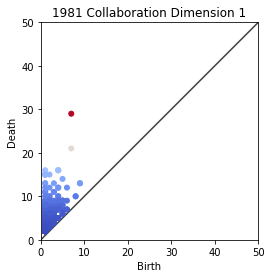

1982
Betti Numbers:  [8001, 152, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [31422, 45835, 43946, 49809, 74413, 129012, 226028, 368285, 532969, 668125, 715931, 650688, 498598, 320014, 170576, 74615, 26334, 7315, 1540, 231, 22, 1, 0]


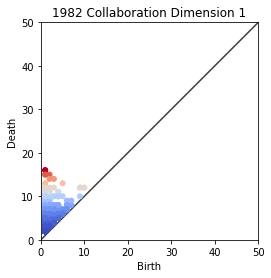

1983
Betti Numbers:  [7988, 133, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [31301, 45055, 40688, 39997, 48896, 67042, 89964, 109550, 116769, 106723, 82355, 52890, 27828, 11765, 3893, 970, 171, 19, 1, 0]


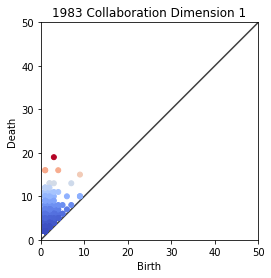

1984
Betti Numbers:  [8097, 154, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [32001, 46915, 43899, 45734, 60164, 87090, 119522, 144933, 150929, 133183, 98658, 60766, 30744, 12563, 4045, 988, 172, 19, 1, 0]


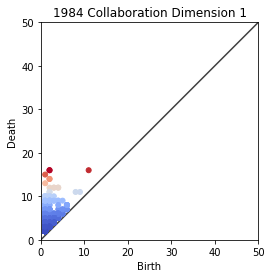

1985
Betti Numbers:  [8403, 205, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [34321, 52040, 49992, 50894, 62213, 83452, 109147, 130209, 136551, 122835, 93067, 58509, 30080, 12428, 4028, 987, 172, 19, 1, 0]


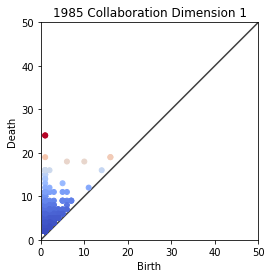

1986
Betti Numbers:  [8747, 203, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [36469, 56934, 57459, 61505, 76596, 100211, 124202, 139003, 137496, 118424, 87512, 54595, 28225, 11823, 3897, 970, 171, 19, 1, 0]


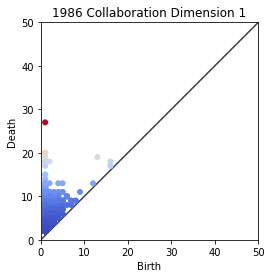

1987
Betti Numbers:  [9156, 240, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [39418, 63495, 65677, 68765, 78276, 88119, 88748, 75672, 53082, 30007, 13375, 4570, 1149, 199, 21, 1, 0]


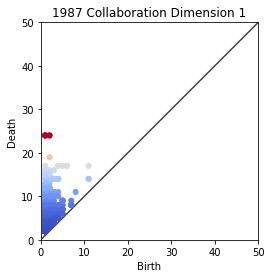

1988
Betti Numbers:  [9658, 274, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [43456, 72683, 77626, 80854, 88900, 98081, 100459, 90387, 69244, 44319, 23333, 9928, 3332, 850, 155, 18, 1, 0]


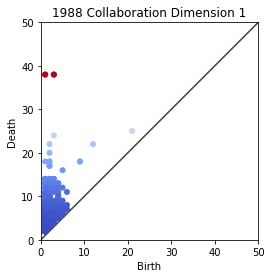

1989
Betti Numbers:  [10004, 356, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [47321, 82410, 93162, 105226, 127891, 159924, 193381, 215157, 212328, 181052, 130861, 78896, 39033, 15538, 4847, 1140, 190, 20, 1, 0]


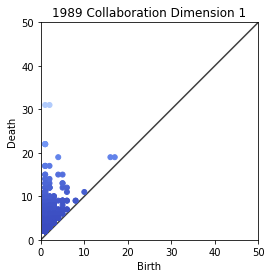

1990
Betti Numbers:  [10410, 349, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [49898, 88056, 103324, 132792, 223117, 475910, 1107308, 2466841, 4934078, 8650425, 13194535, 17478819, 20105162, 20076750, 17389505, 13039187, 8436493, 4686846, 2220076, 888030, 296010, 80730, 17550, 2925, 351, 27, 1, 0]


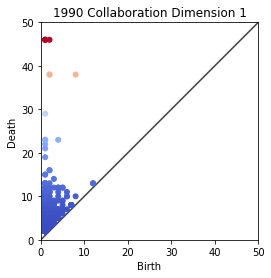

1991
Betti Numbers:  [10500, 398, 7, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [51072, 91893, 111786, 157280, 308958, 748951, 1840286, 4133320, 8173289, 14063199, 20992238]


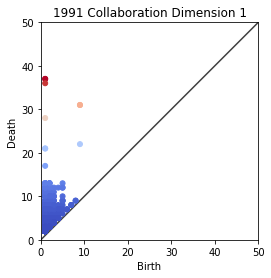

1992
Betti Numbers:  [10801, 423, 13, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [53330, 97096, 118553, 164487, 315260, 749893, 1829406, 4107757, 8137645, 14027140, 20964213]


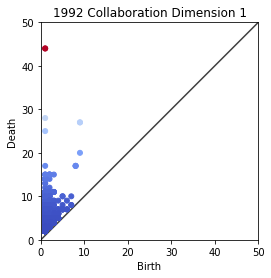

1993
Betti Numbers:  [11304, 411, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [56545, 104498, 127359, 163079, 261491, 519480, 1141578, 2471921, 4900816, 8589670, 13129475, 17428726, 20075981]


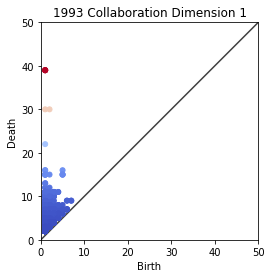

1994
Betti Numbers:  [11795, 481, 2, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [60633, 115993, 150383, 219327, 458222, 1292349, 3949296, 11362633, 29183389, 65895647, 130526129]


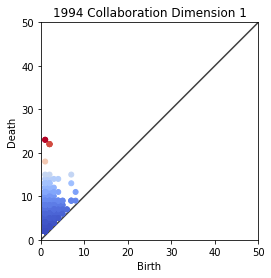

2012
Betti Numbers:  [9628, 330, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [55747, 133778, 248579, 504545, 1152170, 2740392, 6344204, 13763762, 27407203, 49468925, 80297579, 116623403, 151067669]


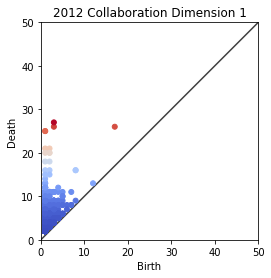

2013
Betti Numbers:  [6718, 102, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [36888, 87656, 165579, 343655, 798923, 1913243, 4383649, 9215047, 17402963, 29223299, 43406588, 56866450, 65583487]


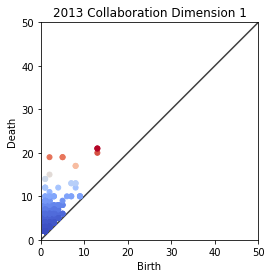

2014
Betti Numbers:  [3297, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cell Counts:  [15731, 35070, 64431, 139290, 378050, 1121532, 3168250, 7995817, 17651930, 33920899, 56758130, 82836565, 105635194]


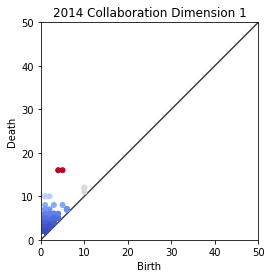

In [17]:
doi = 1
npints = []
names = []
bettis = []
cell_counts = []
for file in files:
    yr = file[:4]
    print(yr)
    try:
        collab_intervals = parse_intervals(os.path.join(collab_data_loc, file))
        collab_bettis = parse_betti(os.path.join(collab_data_loc,file))
        collab_cell_counts = parse_cell_counts(os.path.join(collab_data_loc,file))
    except IndexError:
        continue
    names.append(yr)
    print('Betti Numbers: ', collab_bettis)
    print('Cell Counts: ', collab_cell_counts)
    bettis.append(collab_bettis)
    cell_counts.append(collab_cell_counts)
    ints = []
    for i in range(len(collab_intervals)):
        collab_npint = interval_to_numpy(collab_intervals[i])
        ints.append(collab_npint)
        if i == doi:
            if collab_npint.size > 0:
                plot_diagram(collab_npint, title='{} Collaboration Dimension {}'.format(yr, i), lims=((0,50)))
            plt.show()
    npints.append(ints)
    

In [25]:
doi = 1
diags = []
for i in range(len(npints)):
    npint = npints[i]
    if len(npint) > doi:
        npdoi = npint[doi]
        diags.append(npdoi)
    else:
        diags.append(np.array([]))

In [28]:
yr_ref = 1
bottlenecks = []
wassersteins = []
heats = []
for i in range(yr_ref,len(diags)):
    print('{}/{}'.format(i,len(diags)))
    if diags[i].size > 0:
        diags[i][diags[i] == np.inf] = 50
        bottlenecks.append(persim.bottleneck(diags[yr_ref], diags[i]))
        wassersteins.append(persim.sliced_wasserstein(diags[yr_ref], diags[i]))
#         heats.append(persim.heat(diags[yr_ref], diags[i]))
    else:
        bottlenecks.append(-1)
        wassersteins.append(-1)
#         heats.append(-1)

1/28
2/28
3/28
4/28
5/28
6/28
7/28
8/28
9/28
10/28
11/28
12/28
13/28
14/28
15/28
16/28
17/28
18/28
19/28
20/28
21/28
22/28
23/28
24/28
25/28
26/28
27/28


Text(0.5, 1.0, 'Bottleneck Distance (1971 Reference)')

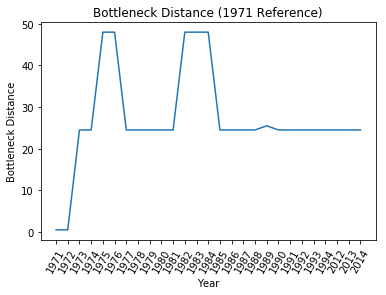

In [32]:
plt.plot(names[yr_ref:], bottlenecks)
plt.xticks(rotation=60)
plt.ylabel('Bottleneck Distance')
plt.xlabel('Year')
plt.title('Bottleneck Distance ({} Reference)'.format(names[yr_ref]))

Text(0.5, 1.0, 'Wasserstein Distance (1971 Reference)')

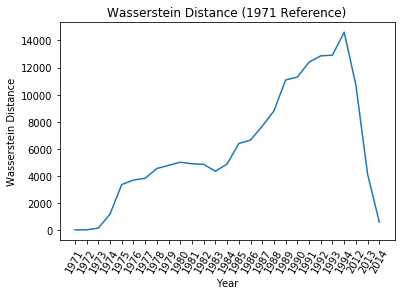

In [33]:
plt.plot(names[yr_ref:], wassersteins)
plt.xticks(rotation=60)
plt.ylabel('Wasserstein Distance')
plt.xlabel('Year')
plt.title('Wasserstein Distance ({} Reference)'.format(names[yr_ref]))

In [34]:
# plt.plot(names[yr_ref:], heats)
# plt.xticks(rotation=60)
# plt.ylabel('Heat Kernel Distance')
# plt.xlabel('Year')
# plt.title('Heat Kernel Distance ({} Reference)'.format(names[yr_ref]))

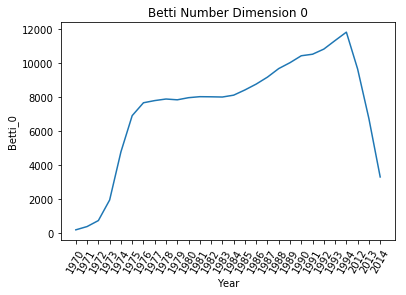

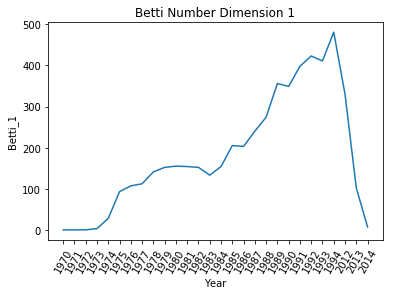

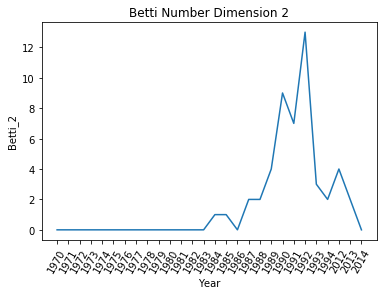

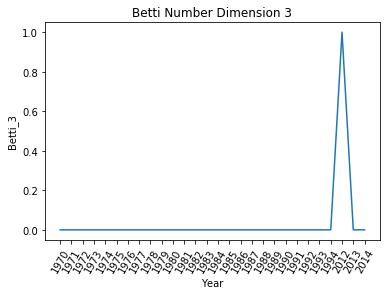

In [23]:
for d in range(4):
    plt.plot(names, [b[d] for b in bettis])
    plt.xticks(rotation=60)
    plt.ylabel('Betti_{}'.format(d))
    plt.xlabel('Year')
    plt.title('Betti Number Dimension {}'.format(d))
    plt.show()

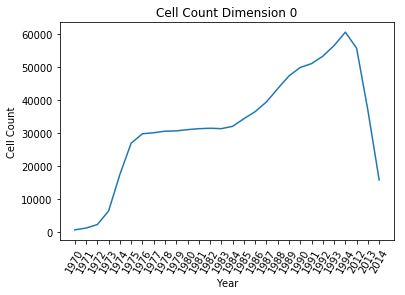

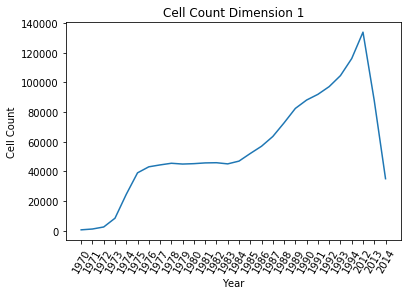

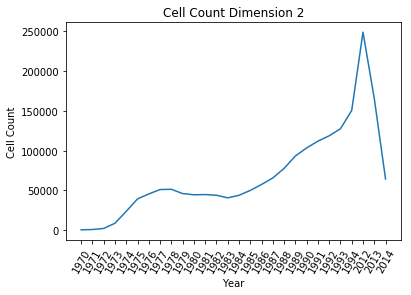

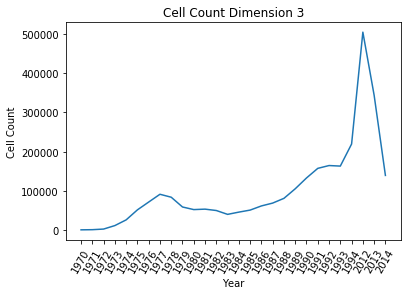

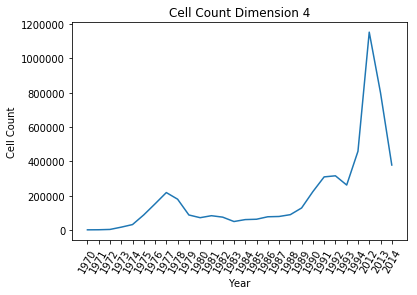

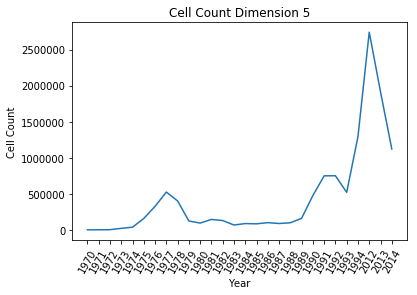

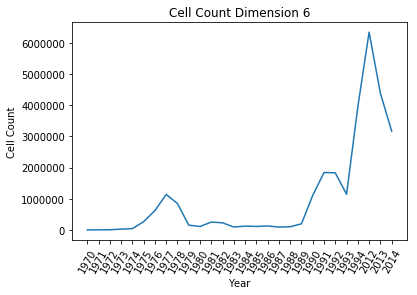

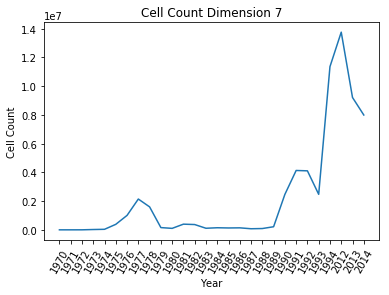

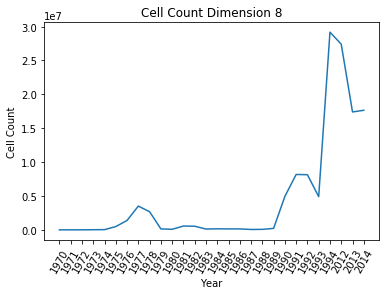

In [24]:
for d in range(9):
    plt.plot(names, [c[d] for c in cell_counts])
    plt.xticks(rotation=60)
    plt.ylabel('Cell Count'.format(d))
    plt.xlabel('Year')
    plt.title('Cell Count Dimension {}'.format(d))
    plt.show()

In [15]:
# for file in files[:1]:
#     yr = file[:4]
#     print(yr)
    
#     collab_intervals = parse_intervals(os.path.join(collab_data_loc, file))
#     collab_bettis = parse_betti(os.path.join(collab_data_loc,file))
#     collab_cell_counts = parse_cell_counts(os.path.join(collab_data_loc,file))
#     collab_euler_characteristic = parse_euler_characteristic(os.path.join(collab_data_loc,file))
    
#     knowl_intervals = parse_intervals(os.path.join(knowl_data_loc, file))
#     knowl_bettis = parse_betti(os.path.join(knowl_data_loc,file))
#     knowl_cell_counts = parse_cell_counts(os.path.join(knowl_data_loc,file))
#     knowl_euler_characteristic = parse_euler_characteristic(os.path.join(knowl_data_loc,file))
    
#     print(collab_bettis, knowl_bettis)
#     print(collab_cell_counts, knowl_cell_counts)
    
#     for i in range(min(len(collab_intervals), len(knowl_intervals))):
#         collab_npint = interval_to_numpy(collab_intervals[i])
#         knowl_npint = interval_to_numpy(knowl_intervals[i])
#         if collab_npint.size > 0:
#             plot_diagram(collab_npint, title='{} Collaboration Persistence Diagram Dimension {}'.format(yr, i))
#         if knowl_npint.size > 0:
#             plot_diagram(knowl_npint, title='{} Knowledge Persistence Diagram Dimension {}'.format(yr, i))

In [16]:
# for i in range(len(collab_intervals)-1):
#     print(persim.bottleneck(interval_to_numpy(collab_intervals[i]), interval_to_numpy(knowl_intervals[i])))